<a href="https://colab.research.google.com/github/mal258/machinelearning258/blob/master/Invincibles_Web_MD_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Value :** 
Due to big data progress in biomedical and healthcare communities, accurate study of medical data benefits early disease recognition, patient care and community services. When the quality of medical data is incomplete the exactness of study is reduced. <br>

Our project is a recommendation system for diagnosing diseases for patients with known symptoms and an exploratory analysis of
healthy lifestyle to avoid such disesases.



## Data Narative
 We look at factors such as patient's gender, age, symptoms, chronic ailment etc and
determine the disease person might have. Further the system will look at driving factors for leading a healthy lifestyle considering person's
lifestyle, sleep patterns and heart condition.
To achieve this, we have the following datasets:
  1. symptoms-disease diagonosis
  2. heart health
  3. fitbit readings and sleep patterns
 

# Import libraries

In [1]:
# Impot libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import requests
import io
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score,classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler
%pip install factor_analyzer
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import factor_analyzer
from factor_analyzer import FactorAnalyzer
import numpy as np
import pandas as pd
import os
from sklearn import tree 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 40kB 5.9MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp36-none-any.whl size=40380 sha256=73d5fff6fd9ba0c00c6bc08a7bd66d413cade8fbf3815df33b9f310eaa09cf1c
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


# Load train & test data

In [0]:
#Data set load
# This creates a pandas dataframe and assigns it to the titanic variable.
url="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/Training.csv"
file=requests.get(url).content
disease_df=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')

Let's check the number of rows and counts

In [3]:
disease_df.head()

itching  skin_rash  ...  yellow_crust_ooze         prognosis
0        1          1  ...                  0  Fungal infection
1        0          1  ...                  0  Fungal infection
2        1          0  ...                  0  Fungal infection
3        1          1  ...                  0  Fungal infection
4        1          1  ...                  0  Fungal infection

[5 rows x 133 columns]

In [4]:
#shape command will give number of rows/samples/examples and number of columns/features/predictors in dataset
#(rows,columns)
disease_df.shape

(4920, 133)

In [5]:
#seeing any null values are there with descending format
disease_df.isnull().sum().sort_values(ascending=False)

prognosis               0
malaise                 0
nausea                  0
loss_of_appetite        0
pain_behind_the_eyes    0
                       ..
internal_itching        0
toxic_look_(typhos)     0
depression              0
irritability            0
itching                 0
Length: 133, dtype: int64

In [6]:
disease_df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

Checking how much percent each diseases in our data set

In [7]:
disease_df['prognosis'].value_counts(normalize = True)

Hypothyroidism                             0.02439
Gastroenteritis                            0.02439
Impetigo                                   0.02439
Cervical spondylosis                       0.02439
Heart attack                               0.02439
hepatitis A                                0.02439
Diabetes                                   0.02439
Allergy                                    0.02439
Common Cold                                0.02439
Hyperthyroidism                            0.02439
Dimorphic hemmorhoids(piles)               0.02439
Hepatitis B                                0.02439
GERD                                       0.02439
Hepatitis D                                0.02439
Hepatitis E                                0.02439
Migraine                                   0.02439
Psoriasis                                  0.02439
Arthritis                                  0.02439
Peptic ulcer diseae                        0.02439
Paralysis (brain hemorrhage)   

# **Visualizations**

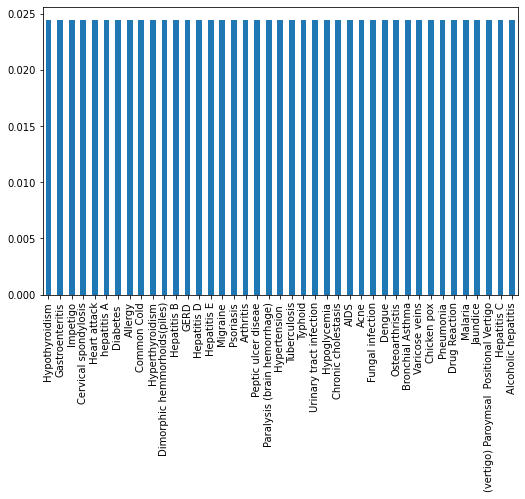

In [8]:
#We could see disease having the same percentage through bar chart
disease_df['prognosis'].value_counts(normalize = True).plot.bar()
plt.subplots_adjust(left = 0.9, right = 2 , top = 2, bottom = 1)

In [9]:
disease_df.dtypes.unique()

array([dtype('int64'), dtype('O')], dtype=object)

# Symptom Analysis

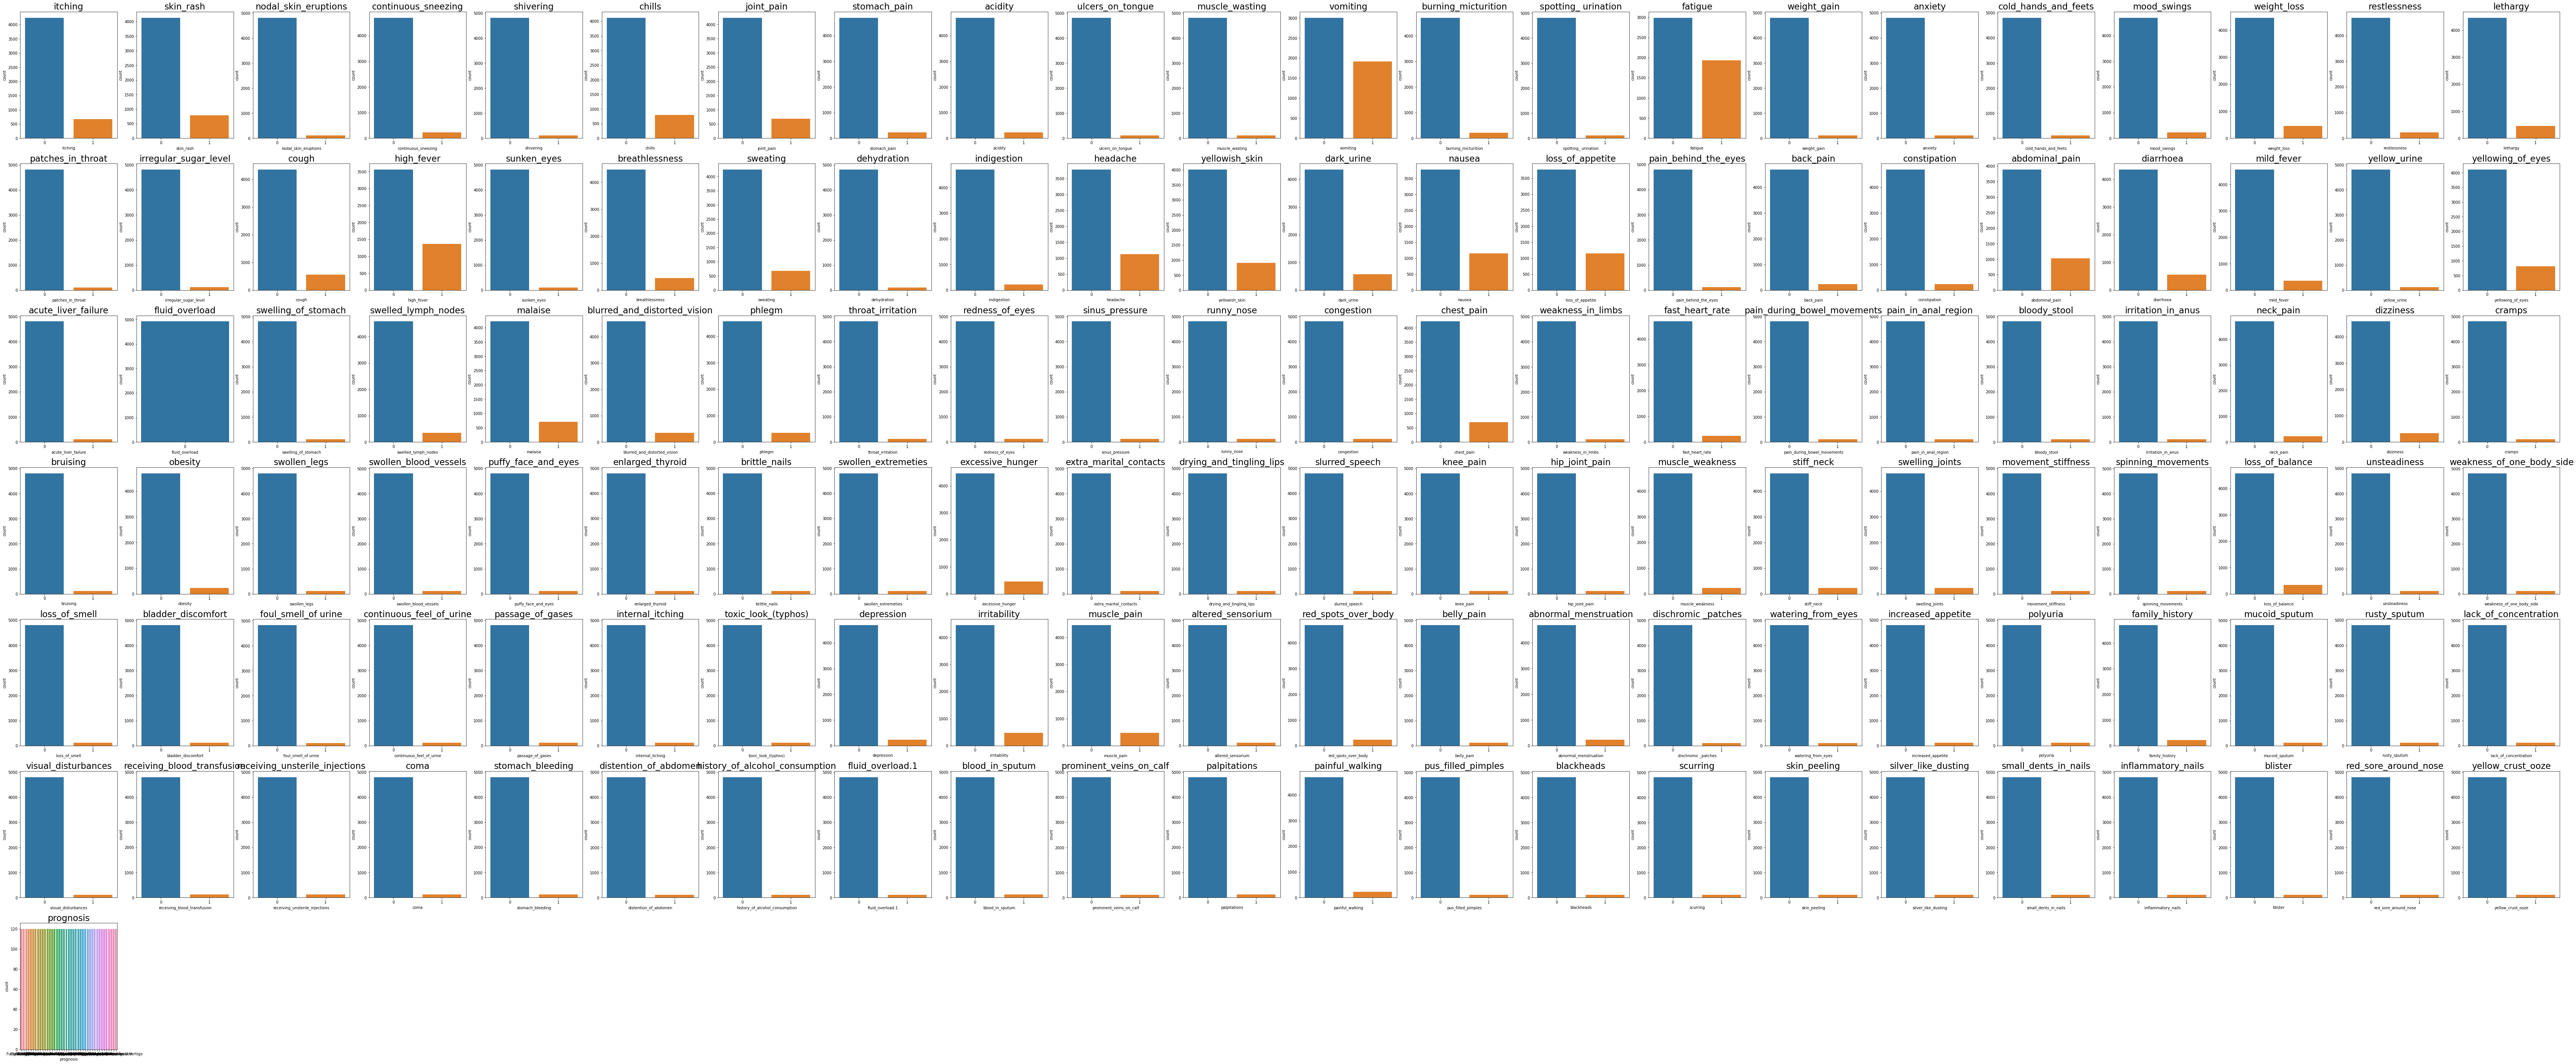

In [10]:
for x in range(disease_df.shape[1]):
    plt.subplot(7,22,x+1)
    plt.subplots_adjust(left = 0.5, right = 16 , top = 10, bottom = 0.5)
    sns.countplot(disease_df[disease_df.columns[x]]).set_title(disease_df.columns[x],fontsize=23)

Identified correlation and we took two high correlated variables and analysing if it is satisfying null hypothesis or alternate hypothesis

In [11]:
pd.crosstab(disease_df['cold_hands_and_feets'],disease_df['weight_gain'])

weight_gain              0    1
cold_hands_and_feets           
0                     4800    6
1                        6  108

In [0]:
from scipy.stats import chi2_contingency

In [13]:
chi2_contingency(pd.crosstab(disease_df['cold_hands_and_feets'],disease_df['weight_gain']))

(4362.40173527245, 0.0, 1, array([[4.69464146e+03, 1.11358537e+02],
        [1.11358537e+02, 2.64146341e+00]]))

In [0]:
x = disease_df.drop(['prognosis'],axis =1)
y = disease_df['prognosis']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [0]:
from sklearn.naive_bayes import MultinomialNB

# **Algorithm and Fitting**

In [0]:
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
y_pred = mnb.predict(x_test)

In [21]:
accuracy_score(y_pred,y_test)

1.0

by cross validating we got mean also 100%

In [22]:
from sklearn.model_selection import cross_val_score
disease_scores = cross_val_score(mnb, x_test, y_test, cv=3)
print (disease_scores)
print (disease_scores.mean())

[1. 1. 1.]
1.0


In [0]:
actual_diseases = y_test.values

for the cross checking purpose i want to see if predicted values and actual values are same else it gives me worng prediction 

In [24]:
for i in range(0, len(actual_diseases)):
    if y_pred[i] == actual_diseases[i]:
        print ('Pred: {0} Actual:{1}'.format(y_pred[i], actual_diseases[i]))
    else:
        print('worng prediction')
        print ('Pred: {0} Actual:{1}'.format(y_pred[i], actual_diseases[i]))

Pred: Acne Actual:Acne
Pred: Acne Actual:Acne
Pred: Hyperthyroidism Actual:Hyperthyroidism
Pred: AIDS Actual:AIDS
Pred: Chronic cholestasis Actual:Chronic cholestasis
Pred: Hypertension  Actual:Hypertension 
Pred: Hypoglycemia Actual:Hypoglycemia
Pred: Arthritis Actual:Arthritis
Pred: Hepatitis B Actual:Hepatitis B
Pred: Migraine Actual:Migraine
Pred: Urinary tract infection Actual:Urinary tract infection
Pred: Diabetes  Actual:Diabetes 
Pred: Hepatitis D Actual:Hepatitis D
Pred: Psoriasis Actual:Psoriasis
Pred: Alcoholic hepatitis Actual:Alcoholic hepatitis
Pred: Alcoholic hepatitis Actual:Alcoholic hepatitis
Pred: Dimorphic hemmorhoids(piles) Actual:Dimorphic hemmorhoids(piles)
Pred: Hepatitis E Actual:Hepatitis E
Pred: Diabetes  Actual:Diabetes 
Pred: Cervical spondylosis Actual:Cervical spondylosis
Pred: Bronchial Asthma Actual:Bronchial Asthma
Pred: hepatitis A Actual:hepatitis A
Pred: Hepatitis B Actual:Hepatitis B
Pred: Bronchial Asthma Actual:Bronchial Asthma
Pred: Allergy Actu

**Function to run multiple algorithms with different K values of KFold.**

In [0]:
from sklearn.model_selection import KFold

In [0]:
def evaluate(train_data,kmax,algo):
    test_scores = {}
    train_scores = {}
    for i in range(2,kmax,2):
        kf = KFold(n_splits = i)
        sum_train = 0
        sum_test = 0
        data = disease_df
        for train,test in kf.split(data):
            train_data = data.iloc[train,:]
            test_data = data.iloc[test,:]
            x_train = train_data.drop(["prognosis"],axis=1)
            y_train = train_data['prognosis']
            x_test = test_data.drop(["prognosis"],axis=1)
            y_test = test_data["prognosis"]
            algo_model = algo.fit(x_train,y_train)
            sum_train += algo_model.score(x_train,y_train)
            y_pred = algo_model.predict(x_test)
            sum_test += accuracy_score(y_test,y_pred)
        average_test = sum_test/i
        average_train = sum_train/i
        test_scores[i] = average_test
        train_scores[i] = average_train
        print("kvalue: ",i)
    return(train_scores,test_scores)  

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
nb = MultinomialNB()
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',)
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(n_estimators = 10)
from sklearn import svm
clf = svm.LinearSVC(C = 1.0, multi_class='crammer_singer')

In [0]:
#algo_dict = {'Logistic':log,'Decsion_Tree':dt,'Random_Forest_Classifier':ran,'Naive_Bayes' : nb,'Support_Vector_Machine':clf }
algo_dict = {'Decsion_Tree':dt,'Support_Vector_Machine':clf }
algo_train_scores={}
algo_test_scores={}

Decision Tree and Support Vector Machine was found to be best fit with training score of 0.1 and testing score of 0.87 with k value of 2 in the k fold cross validation. All the other algorithm seems to be overfit.

In [29]:
max_kfold = 11
for algo_name in algo_dict.keys():
    print(algo_name)
    tr_score,tst_score = evaluate(disease_df,max_kfold,algo_dict[algo_name])
    algo_train_scores[algo_name] = tr_score
    algo_test_scores[algo_name] = tst_score
print(algo_train_scores)
print(algo_test_scores)

Decsion_Tree
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
Support_Vector_Machine
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
{'Decsion_Tree': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'Support_Vector_Machine': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}}
{'Decsion_Tree': {2: 0.8707317073170732, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'Support_Vector_Machine': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}}


In [0]:
df_test = pd.DataFrame(algo_test_scores)
df_train = pd.DataFrame(algo_train_scores)

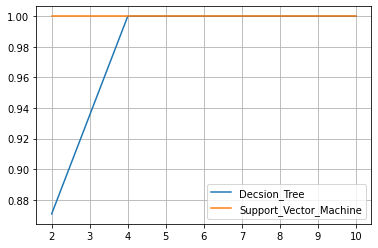

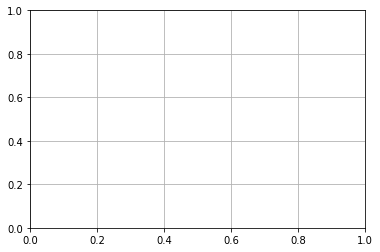

In [31]:
df_test.plot(grid = 1)
plt.show()
plt.grid()

In [32]:
#building the model at k value 2 
test_scores={}
train_scores={}
for i in range(2,4,2):
    kf = KFold(n_splits = i)
    sum_train = 0
    sum_test = 0
    data = disease_df
    for train,test in kf.split(data):
        train_data = data.iloc[train,:]
        test_data = data.iloc[test,:]
        x_train = train_data.drop(["prognosis"],axis=1)
        y_train = train_data['prognosis']
        x_test = test_data.drop(["prognosis"],axis=1)
        y_test = test_data["prognosis"]
        algo_model = dt.fit(x_train,y_train)
        sum_train += dt.score(x_train,y_train)
        y_pred = dt.predict(x_test)
        sum_test += accuracy_score(y_test,y_pred)
    average_test = sum_test/i
    average_train = sum_train/i
    test_scores[i] = average_test
    train_scores[i] = average_train
    print("kvalue: ",i)  

kvalue:  2


**Model Accuracy**

In [33]:
#print(train_scores)
print('Accuracy of the model',test_scores)

Accuracy of the model {2: 0.875609756097561}


In [34]:

from sklearn.externals import joblib
joblib.dump(dt,'invincibles_web_md_disease_Prediction')

['invincibles_web_md_disease_Prediction']

# ***Analysis of heart health according to an individual's life style***   




##  ***Model Implementation***
>  K-mean Cluster<br>
>  GMM Cluster<br>
>  Linear Regression<br>
>  PCA<br>
>  Latent variables<br>
>  Logistic Regression<br>
>  K-NN<br>
>  Random Forest<br>
>  Gaussian Naive Bayes<br>
>  Decision Tree<br>





Daignosing a heart disease is a serious problem and doing it using a machine learning application is a hard sell. If the output from the model points its as a weak heart, then people will need to know why. We have used two datasets here which are combined in order to get better results from the mnodel. The data sets consists of various features with reading of certain test results as well as person's life style which may cause a heart disease.

The aim here is to identify if a person has a weak heart or a good heart according to his age, lifestyle and other factors which may impact his heart health.

### Fist dataset which consists of life style of a person.

In [36]:
url="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/disease_life_style.csv"
file=requests.get(url).content
df_daily=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')

df_daily= df_daily.rename({'male':'sex'}, axis='columns')
df_daily = df_daily.drop(['education', 'BPMeds'], axis=1)
print(df_daily.shape)
df_daily.head()


(4240, 14)


sex  age  currentSmoker  cigsPerDay  ...    BMI  heartRate  glucose  TenYearCHD
0    1   39              0         0.0  ...  26.97       80.0     77.0           0
1    0   46              0         0.0  ...  28.73       95.0     76.0           0
2    1   48              1        20.0  ...  25.34       75.0     70.0           0
3    0   61              1        30.0  ...  28.58       65.0    103.0           1
4    0   46              1        23.0  ...  23.10       85.0     85.0           0

[5 rows x 14 columns]

### Second dataset which consists of several lab readings.

In [37]:
url="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/heart.csv"
file=requests.get(url).content
heart=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')
#heart = heart.rename({'chol':'totChol'}, axis='columns')
print(heart.shape)
heart = heart.drop(['num', 'slope', 'fbs', 'restecg','exang','oldpeak','cp','chol'], axis=1)


(303, 12)


In [38]:
df = pd.merge(df_daily, heart, how='left')
df.shape

(17561, 16)

In [39]:
df.isnull().sum()

sex                   0
age                   0
currentSmoker         0
cigsPerDay          127
prevalentStroke       0
prevalentHyp          0
diabetes              0
totChol             159
sysBP                 0
diaBP                 0
BMI                  52
heartRate             7
glucose            1406
TenYearCHD            0
trestbps            368
thalach             368
dtype: int64

In [40]:
df_new = df.dropna()
df_new.shape

(15647, 16)

In [41]:
df_new.head()

sex  age  currentSmoker  cigsPerDay  ...  glucose  TenYearCHD  trestbps  thalach
0    1   39              0         0.0  ...     77.0           0     140.0    182.0
1    1   39              0         0.0  ...     77.0           0     118.0    140.0
2    0   46              0         0.0  ...     76.0           0     142.0    160.0
3    0   46              0         0.0  ...     76.0           0     105.0    172.0
4    0   46              0         0.0  ...     76.0           0     138.0    152.0

[5 rows x 16 columns]

In [42]:
df_new.describe()


sex           age  ...      trestbps       thalach
count  15647.000000  15647.000000  ...  15647.000000  15647.000000
mean       0.650093     51.977312  ...    130.379753    152.362753
std        0.476956      7.671033  ...     17.090075     21.992906
min        0.000000     34.000000  ...     94.000000     71.000000
25%        0.000000     45.000000  ...    120.000000    140.000000
50%        1.000000     52.000000  ...    130.000000    156.000000
75%        1.000000     58.000000  ...    140.000000    169.000000
max        1.000000     69.000000  ...    200.000000    195.000000

[8 rows x 16 columns]

# Data enrichment

The base dataset used for this analysis is data consisting of individuals life style and various lab reading related to heart which is of shape (4240, 14). And a seond data set which is related to a persons heart health which is of shape (303, 12) is added to the base dataset selecting only the required features from both of them.


In [43]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15647 entries, 0 to 17560
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              15647 non-null  int64  
 1   age              15647 non-null  int64  
 2   currentSmoker    15647 non-null  int64  
 3   cigsPerDay       15647 non-null  float64
 4   prevalentStroke  15647 non-null  int64  
 5   prevalentHyp     15647 non-null  int64  
 6   diabetes         15647 non-null  int64  
 7   totChol          15647 non-null  float64
 8   sysBP            15647 non-null  float64
 9   diaBP            15647 non-null  float64
 10  BMI              15647 non-null  float64
 11  heartRate        15647 non-null  float64
 12  glucose          15647 non-null  float64
 13  TenYearCHD       15647 non-null  int64  
 14  trestbps         15647 non-null  float64
 15  thalach          15647 non-null  float64
dtypes: float64(9), int64(7)
memory usage: 2.0 MB


### The below plot shows the number of people having BP according to their age.

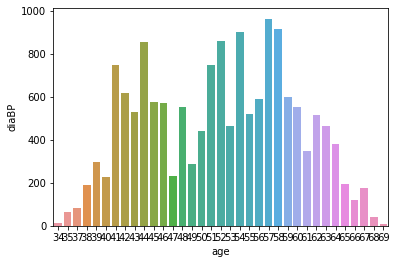

In [44]:
sns.barplot(x=df_new.groupby('age')['sex'].count().reset_index()['age'],y=df_new.groupby('age')['diaBP'].count().reset_index()['diaBP'])

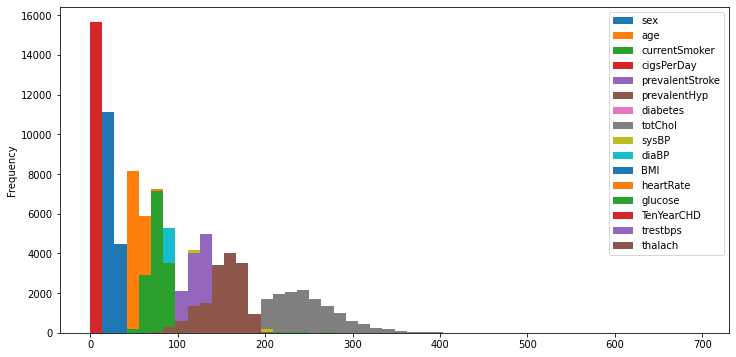

In [45]:
df_new.plot(kind='hist',bins=50,figsize=(12,6))

### Box plots for BP, cholestrol and age as according to heart condition.

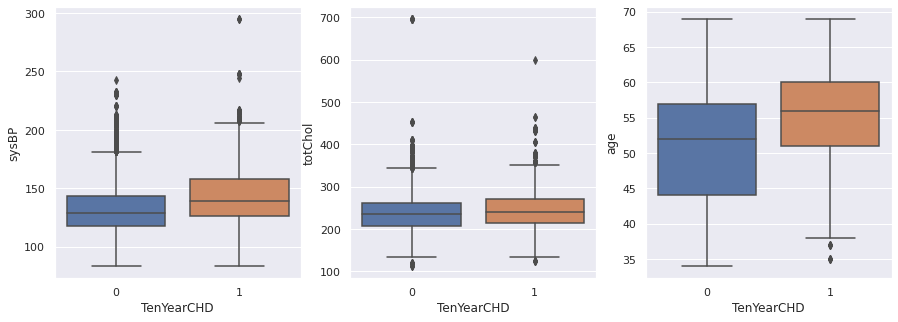

In [46]:
sns.set()
f, axes = plt.subplots(1, 3,figsize=(15,5))
sns.boxplot(y=df_new["sysBP"],x=df_new["TenYearCHD"],orient='v' , ax=axes[0])
sns.boxplot(y=df_new["totChol"],x=df_new["TenYearCHD"], orient='v' , ax=axes[1])
sns.boxplot(y=df_new["age"],x=df_new["TenYearCHD"], orient='v' , ax=axes[2])
plt.show()

### The below plot shows the count of participants having healthy and week  heart according to their age.

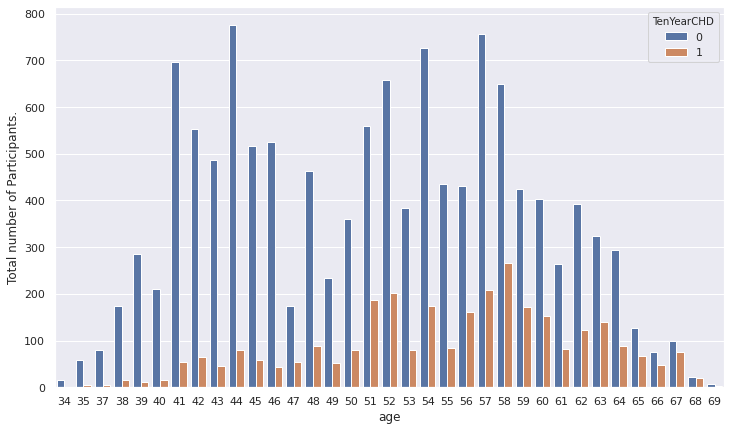

In [47]:
plt.figure(figsize=(12,7))
ax = sns.countplot('age',hue='TenYearCHD', data = df_new )
plt.ylabel('Total number of Participants.')
plt.show()

### Below correlation plot shows the relation between the various features.

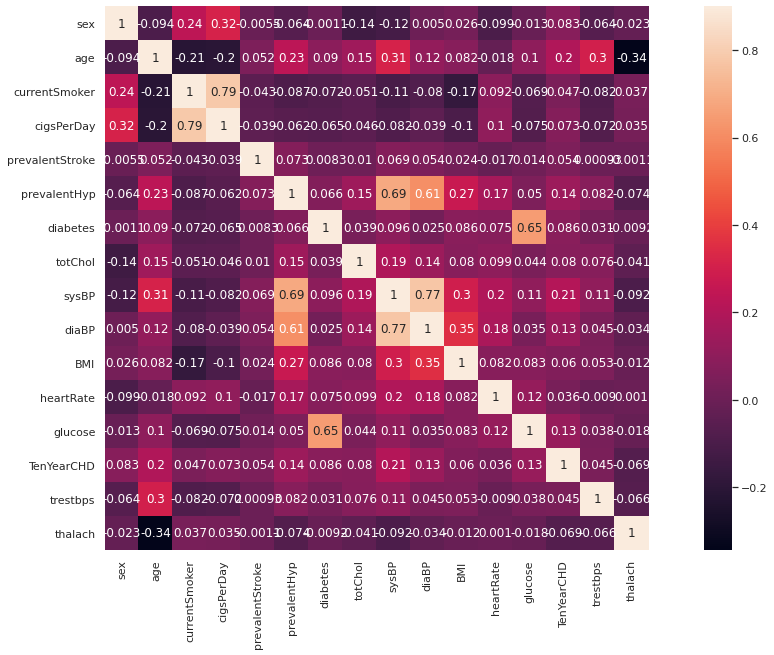

In [48]:
correlation = df_new.corr(method='pearson')
fig, ax = plt.subplots(figsize = (30,20))
fig.set_size_inches(20,10)
sns.heatmap(correlation,vmax = 0.9, square = True, annot = True)
plt.show()

In [49]:
#sns.pairplot(df_new)
print(df_new.shape)
df_new.head()

(15647, 16)


sex  age  currentSmoker  cigsPerDay  ...  glucose  TenYearCHD  trestbps  thalach
0    1   39              0         0.0  ...     77.0           0     140.0    182.0
1    1   39              0         0.0  ...     77.0           0     118.0    140.0
2    0   46              0         0.0  ...     76.0           0     142.0    160.0
3    0   46              0         0.0  ...     76.0           0     105.0    172.0
4    0   46              0         0.0  ...     76.0           0     138.0    152.0

[5 rows x 16 columns]

In [0]:
def roc_plot (y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="upper left")
    plt.show()
    return

## Kmeans  cluster.

### Grouping of participants is done with their age havin particular level of cholestrol with a range of heart rate. 
Elbow curve is plotter in order to identify the number of clusters and we could see the best number was 5. So the same is plotted with 5 groups in the below clustering plot.


In [51]:
from sklearn.cluster import KMeans
x_clust = df_new[['age','totChol','sysBP','heartRate']]
scaler = StandardScaler()
xscaled = scaler.fit_transform(x_clust)
xscaled

array([[-1.69178342, -1.01284888, -1.29320584,  0.41914505],
       [-1.69178342, -1.01284888, -1.29320584,  0.41914505],
       [-0.7792305 ,  0.24006016, -0.60782048,  1.69565402],
       ...,
       [-1.56141872, -1.24065052,  0.30602666, -0.68716272],
       [-1.69178342, -0.99006872, -0.0595122 ,  0.84464804],
       [-1.69178342, -0.99006872, -0.0595122 ,  0.84464804]])

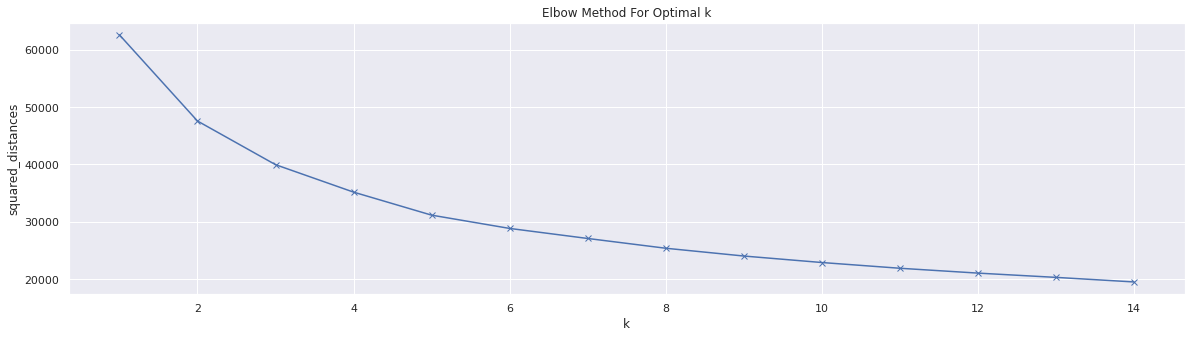

In [52]:
from sklearn.cluster import KMeans
sqd = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(xscaled)
    sqd.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, sqd, 'bx-')
plt.xlabel('k')
plt.ylabel('squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [53]:
kmeans_ = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans_.fit_predict(xscaled)
kmeans_clus = x_clust.assign(Cluster=y_kmeans)
kmeans_group = kmeans_clus.groupby(['Cluster']).mean().round(1)
kmeans_group

age  totChol  sysBP  heartRate
Cluster                                 
0        57.3    224.1  126.9       67.9
1        50.6    297.6  129.2       73.8
2        58.5    255.5  169.1       77.7
3        43.3    210.9  122.2       71.3
4        50.9    235.5  134.7       92.0

K-Means


0.21101251080435815

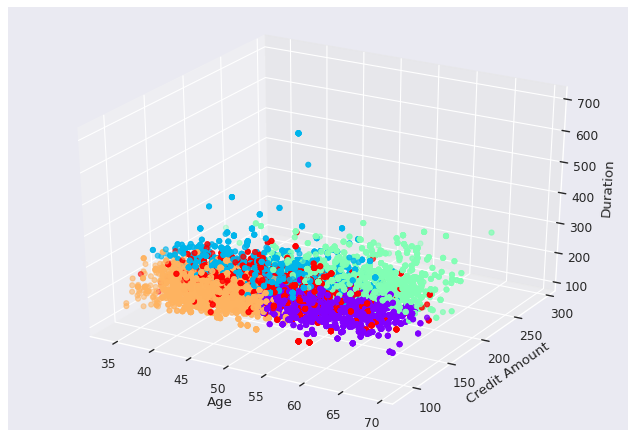

In [54]:
from sklearn.metrics import silhouette_score
fig = plt.figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_new['age'],df_new['sysBP'],df_new['totChol'],c=y_kmeans, cmap='rainbow')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("K-Means")
sil_score = silhouette_score(xscaled, y_kmeans, metric='euclidean', sample_size=None, random_state=None)
sil_score

## GMM Clustering.
GMM clustering is done with a metric of euclidean distance to fine the group of clusters.


In [55]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=5, covariance_type="spherical").fit(xscaled)
labels = gmm.predict(xscaled)
GMM_sil_score = silhouette_score(xscaled, labels, metric='euclidean', sample_size=None, random_state=None)
GMM_sil_score

0.21336001680342906

GMM - Clustering


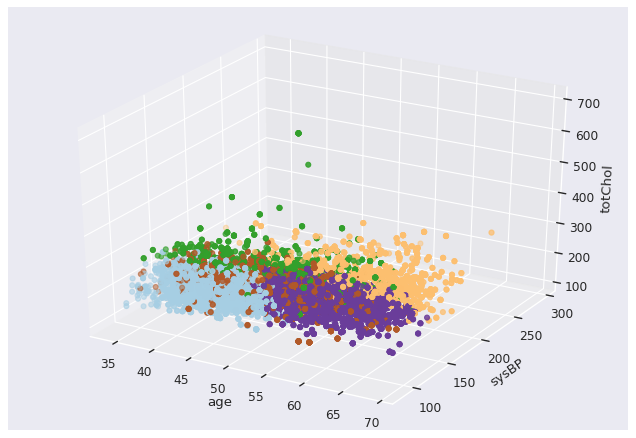

In [56]:
fig = plt.figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_new['age'],df_new['sysBP'],df_new['totChol'],c=labels, cmap=plt.cm.Paired)

xLabel = ax.set_xlabel('age', linespacing=3.2)
yLabel = ax.set_ylabel('sysBP', linespacing=3.1)
zLabel = ax.set_zlabel('totChol', linespacing=3.4)
print("GMM - Clustering")

## Linear Regression
This data set is genrally a classification problem. But we have tried to analyze the data and come up with a method to predict an individuals systolic blood pressure considering his lifestyle and other heath factors.<br>
Below we could see that the prediction has given a quite good accuracy of 72% for this dataset.


In [57]:
xlin = df_new.drop(['TenYearCHD'], axis=1)
ylin = xlin['sysBP']
Xlin = xlin.drop(['sysBP'], axis=1)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(Xlin,ylin,test_size=0.10,random_state=2)
model = LinearRegression()
model.fit(Xtrain,Ytrain)
y_pred=model.predict(Xtest)
print(model.score(Xtest,Ytest)*100)
from sklearn.metrics import mean_squared_error
res = mean_squared_error(y_pred, Ytest)
print(res)


72.62199691960755
122.75561769047997


In [58]:
df_new.shape

(15647, 16)

##PCA
PCA was used to check if we can reduce the dimentionality of the dataset.

PCA- Principle Component Analysis


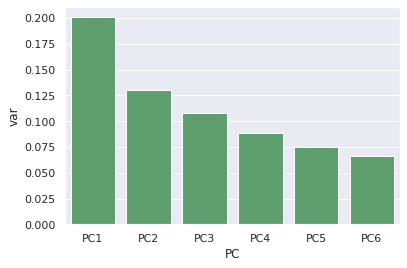

In [59]:
y = df_new['TenYearCHD']
X = df_new.drop(['TenYearCHD'],axis=1)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
pca = PCA(n_components=6)
X = pca.fit_transform(x_scaled)
#plt.figure(figsize=(8,6))
pca = PCA(n_components=6)
pca.fit_transform(x_scaled)
pca.explained_variance_ratio_
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4', 'PC5','PC6']})
sns.barplot(x='PC',y="var", 
           data=df, color="g");
print("PCA- Principle Component Analysis")

#  ***Second Data Enrichment***

## Latent Variables

In [60]:
y = df_new['TenYearCHD']
X = df_new.drop(['TenYearCHD'],axis=1)
fact=FactorAnalyzer(n_factors=6, rotation="varimax")
fact.fit(x_scaled)
loadings=fact.loadings_
ev,v=fact.get_eigenvalues()
vals=range(1,X.shape[1]+1)
latent_var =pd.DataFrame(fact.loadings_)
print(latent_var)


           0         1         2         3         4         5
0   0.015345  0.277443  0.025819 -0.017818 -0.592741  0.141918
1   0.145645 -0.118923  0.056966  0.977329  0.070863 -0.018885
2  -0.069440  0.842532 -0.039426 -0.100421 -0.044203 -0.141152
3  -0.053246  0.915460 -0.041773 -0.079658 -0.099598  0.013179
4   0.082929 -0.042902  0.007953  0.030503 -0.020539 -0.015422
5   0.686460  0.001289  0.021199  0.127035  0.160125  0.147167
6   0.035784 -0.034705  0.682329  0.041543  0.028239  0.048560
7   0.115251 -0.004581  0.023588  0.120184  0.258772  0.082729
8   0.899207 -0.001695  0.062256  0.169336  0.229982  0.071800
9   0.813925  0.016484 -0.009481 -0.001463  0.089931  0.272683
10  0.274277 -0.093257  0.065855  0.033176  0.029747  0.470691
11  0.156863  0.151278  0.104174 -0.047897  0.267282  0.088944
12  0.032411 -0.025905  0.942925  0.037731  0.054628  0.019278
13  0.032505 -0.047351  0.017756  0.284655  0.088038  0.052518
14 -0.054063  0.002968 -0.003474 -0.336736  0.038847  0

Scree Plot


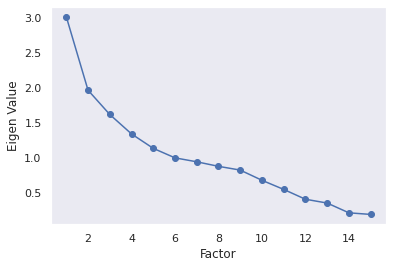

In [61]:
plt.scatter(vals,ev)
plt.plot(vals,ev)
print("Scree Plot")
plt.xlabel('Factor')
plt.ylabel('Eigen Value')
plt.grid()
plt.show()

##Latent Manifold

array([[-79.49610972, -30.01770891],
       [-72.10067549,   4.68900327],
       [ 14.37930379,   0.59140005],
       ...,
       [-67.13220559, -38.16511489],
       [-82.64627391, -26.28861431],
       [-79.27602185,  -9.14223309]])

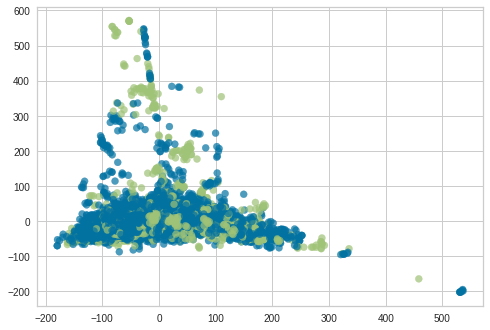

In [62]:
from yellowbrick.features import Manifold
latent_model = Manifold(manifold="isomap")
latent_model.fit_transform(xlin, y) 

In [0]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=0)

In [0]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=27, ratio=1.0)
# X_train, y_train = sm.fit_sample(X_train, y_train)

In [65]:
model=XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: ")
print(round(accuracy_score(y_test,y_pred)*100,2))
cm= confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

Accuracy: 
84.75
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3772
           1       0.94      0.24      0.38       923

    accuracy                           0.85      4695
   macro avg       0.89      0.62      0.65      4695
weighted avg       0.86      0.85      0.81      4695



##Logistic Regression

At this point we tried using different classification models to get out final results of prediction. We start with Logistic regression which gives a quite good results with an accuracy of 81%.

In [66]:

model2 = LogisticRegression()
model2.fit(X_train,y_train)
y_lgr_pred=model2.predict(X_test)
from sklearn.metrics import mean_squared_error
res = mean_squared_error(y_lgr_pred, y_test)
print(res)
model2.score(X_test,y_test)

0.18892438764643238


0.8110756123535676

In [67]:
cm= confusion_matrix(y_test, y_lgr_pred)
print(classification_report(y_test, y_lgr_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      3772
           1       0.68      0.07      0.13       923

    accuracy                           0.81      4695
   macro avg       0.75      0.53      0.51      4695
weighted avg       0.79      0.81      0.74      4695



## k-Nearest neighbor classification

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(knn.score(X_test, y_test)*100)
print(classification_report(y_test, knn_pred))

83.15228966986156
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      3772
           1       0.75      0.22      0.33       923

    accuracy                           0.83      4695
   macro avg       0.79      0.60      0.62      4695
weighted avg       0.82      0.83      0.79      4695



## Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()

In [70]:
rforest.fit(X_train,y_train)
rforest_pred = rforest.predict(X_test)
print('Accuracy:',accuracy_score(rforest_pred,y_test) )
print('Confusion Matrix:', confusion_matrix(rforest_pred,y_test).ravel()) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(rforest_pred,y_test))

Accuracy: 0.9855165069222577
Confusion Matrix: [3771   67    1  856]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3838
           1       0.93      1.00      0.96       857

    accuracy                           0.99      4695
   macro avg       0.96      0.99      0.98      4695
weighted avg       0.99      0.99      0.99      4695



## Gaussian Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())
y_pred = gnb.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(cm)

Model accuracy score: 0.7900
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      4202
           1       0.23      0.44      0.30       493

    accuracy                           0.79      4695
   macro avg       0.58      0.63      0.59      4695
weighted avg       0.85      0.79      0.82      4695

[[3494  278]
 [ 708  215]]


## Decision Tree 

In [72]:
from sklearn import tree 
#data_train, data_test, label_train, label_test = train_test_split(x, y, test_size = 0.2, random_state = 50)
dt2 = tree.DecisionTreeClassifier(random_state=5, max_depth=3)
dt2.fit(X_train, y_train)
dt2_score_train = dt2.score(X_train, y_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(X_test, y_test)
print("Testing score: ",dt2_score_test)
y_pred = dt2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_pred,y_test))

Training score:  0.8159240321402483
Testing score:  0.8089456869009585
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      4337
           1       0.21      0.54      0.30       358

    accuracy                           0.81      4695
   macro avg       0.58      0.68      0.59      4695
weighted avg       0.90      0.81      0.84      4695



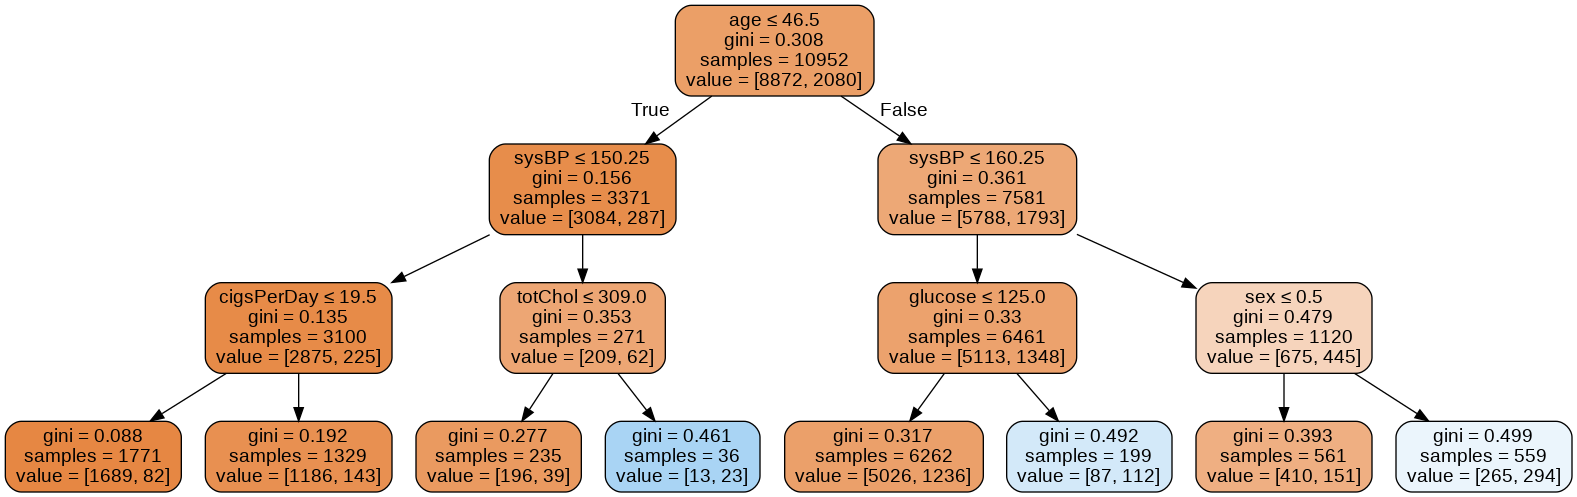

In [73]:
dt3 = tree.DecisionTreeClassifier(random_state=5, max_depth=3)
dtree = dt3.fit(X_train, y_train)
features = xlin.columns
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names = features, 
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Analysis of heart health with Fitbit data.

###Reading Fitbit's heart rate.
####The heart rate dataset has about 3.5 million records for 14 participants recording their heartbeat over a period of 2 months, every 6 times per minute.

In [0]:

url="https://raw.githubusercontent.com/mal258/machinelearning258/master/project/heartrate_seconds_merged_1.csv"
file=requests.get(url).content
heart_1=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')


url="https://raw.githubusercontent.com/mal258/machinelearning258/master/project/heartrate_seconds_merged_2.csv"
file=requests.get(url).content
heart_2=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')

heart = pd.concat([heart_1, heart_2], ignore_index=True)



In [75]:
heart.head()

source  participant-id     timestamp  heart-rate
0  fitbit      2022484408  1.459497e+09          93
1  fitbit      2022484408  1.459497e+09          91
2  fitbit      2022484408  1.459497e+09          96
3  fitbit      2022484408  1.459497e+09          98
4  fitbit      2022484408  1.459497e+09         100

In [76]:


print(heart.shape)


(3638339, 4)


###Converting timestamp field into date format.-

In [0]:
from datetime import datetime

heart["date"]=pd.to_datetime(heart['timestamp'],unit='s').dt.date




###Previewing heart rate dataset

In [78]:
heart.head()

source  participant-id     timestamp  heart-rate        date
0  fitbit      2022484408  1.459497e+09          93  2016-04-01
1  fitbit      2022484408  1.459497e+09          91  2016-04-01
2  fitbit      2022484408  1.459497e+09          96  2016-04-01
3  fitbit      2022484408  1.459497e+09          98  2016-04-01
4  fitbit      2022484408  1.459497e+09         100  2016-04-01

###Heart rate data at summary level by taking mean of heart-rate per day per participant

In [79]:
from datetime import datetime


heart_summ=heart.drop(['timestamp'],axis=1)

heart_mean=heart_summ.groupby(['date','participant-id']).mean().reset_index()



heart_mean.head()


date  participant-id  heart-rate
0  2016-03-29      2347167796   71.264220
1  2016-03-30      2347167796   72.835195
2  2016-03-30      6962181067   74.983431
3  2016-03-31      2347167796   70.711957
4  2016-03-31      6962181067   80.819159

###Heart Rate histogram plot to visualize distribution of heart rate data.

Text(0, 0.5, 'Counts')

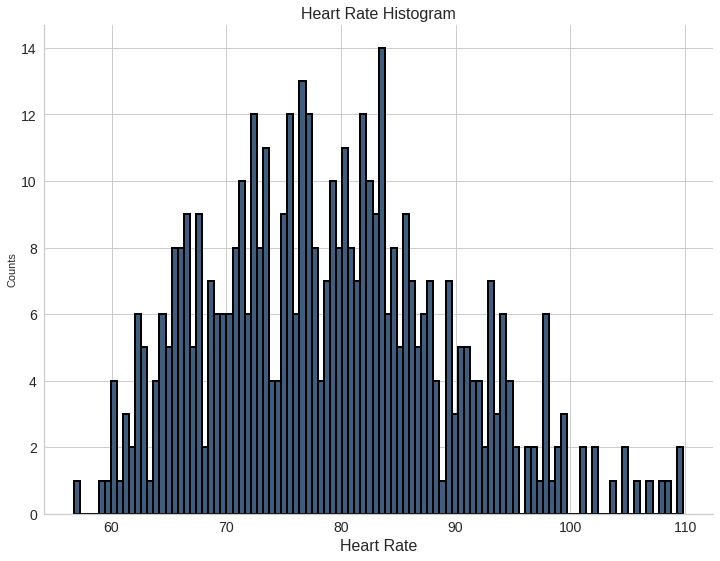

In [80]:
HR = heart_mean['heart-rate']
ST = heart_mean['participant-id']
plt.figure(figsize=(12, 9)) 
plt.hist(HR, range=(np.min(HR),np.max(HR)),
         linewidth=2,color="#3F5D7D", bins=100,edgecolor='black')
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.title('Heart Rate Histogram', fontsize=16)
plt.xlabel('Heart Rate', fontsize=16)
plt.ylabel('Counts')

###Visualizing histograms of individual participant's heart rate.

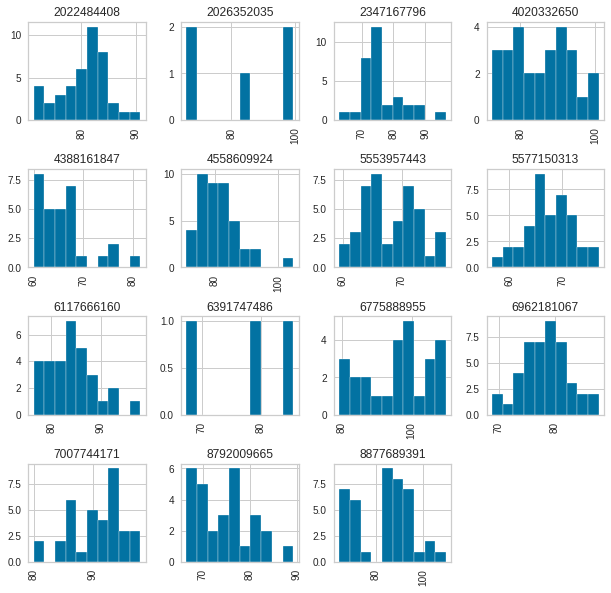

In [81]:
heart_mean['heart-rate'].hist(by=heart_mean['participant-id'],figsize=(10,10))

plt.show()


###Visualizing heart rate of a particular participant throughout a month.

Text(0, 0.5, 'Heart Rate')

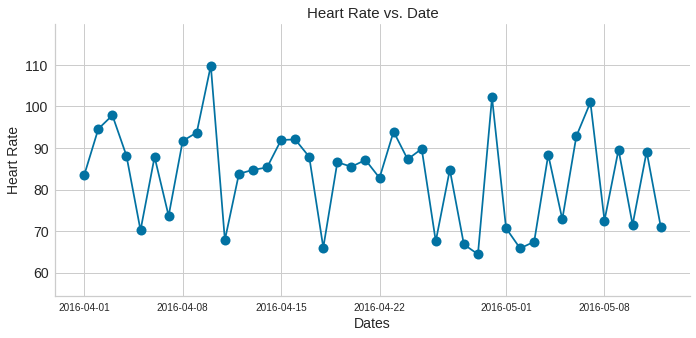

In [82]:
fig = plt.figure(figsize = (25,5))
ax = plt.subplot(121)  





Hourlydf = heart_summ[heart_summ['participant-id']==8877689391].groupby(by='date').mean()
meanHeart = Hourlydf['heart-rate']
plt.plot(meanHeart, linestyle='-', marker='o', markersize=10)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()
ax.set_ylim([np.min(meanHeart)-10, np.max(meanHeart)+10])
plt.xticks(fontsize=10)  
plt.yticks(fontsize=14)  
plt.title('Heart Rate vs. Date', fontsize=15)
plt.xlabel(meanHeart.index.name)
plt.xlabel('Dates', fontsize=14)
plt.ylabel('Heart Rate', fontsize=14)

###Reading Fitbit's daily activity data from repository for all the participants.

In [0]:
url="https://raw.githubusercontent.com/mal258/machinelearning258/master/project/dailyActivity_merged_1.csv"
file=requests.get(url).content
dailyact_1=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')

url="https://raw.githubusercontent.com/mal258/machinelearning258/master/project/dailyActivity_merged_2.csv"
file=requests.get(url).content
dailyact_2=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')

dailyact = pd.concat([dailyact_1, dailyact_2], ignore_index=True)


###Previewing the daily activity data.

In [84]:
dailyact.head()

Id ActivityDate  ...  SedentaryMinutes  Calories
0  1503960366    3/25/2016  ...               804      1819
1  1503960366    3/26/2016  ...               588      2154
2  1503960366    3/27/2016  ...               605      1944
3  1503960366    3/28/2016  ...              1080      1932
4  1503960366    3/29/2016  ...               763      1886

[5 rows x 15 columns]

###Converting Activity Date in timestamp format to Date format

In [0]:
dailyact.head()

dailyact["date"]=pd.to_datetime(dailyact['ActivityDate']).dt.date



In [86]:
dailyact.head()

Id ActivityDate  TotalSteps  ...  SedentaryMinutes  Calories        date
0  1503960366    3/25/2016       11004  ...               804      1819  2016-03-25
1  1503960366    3/26/2016       17609  ...               588      2154  2016-03-26
2  1503960366    3/27/2016       12736  ...               605      1944  2016-03-27
3  1503960366    3/28/2016       13231  ...              1080      1932  2016-03-28
4  1503960366    3/29/2016       12041  ...               763      1886  2016-03-29

[5 rows x 16 columns]

In [87]:
dailyact.shape

(1397, 16)

###Reading Fitbit's sleep data for all the participants from repository

In [0]:
url="https://raw.githubusercontent.com/mal258/machinelearning258/master/project/sleepDay_merged.csv"
file=requests.get(url).content
sleep=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')




sleep["date"]=pd.to_datetime(sleep['SleepDay']).dt.date



In [89]:
sleep.head()

Id               SleepDay  ...  TotalTimeInBed        date
0  1503960366  4/12/2016 12:00:00 AM  ...             346  2016-04-12
1  1503960366  4/13/2016 12:00:00 AM  ...             407  2016-04-13
2  1503960366  4/15/2016 12:00:00 AM  ...             442  2016-04-15
3  1503960366  4/16/2016 12:00:00 AM  ...             367  2016-04-16
4  1503960366  4/17/2016 12:00:00 AM  ...             712  2016-04-17

[5 rows x 6 columns]

In [90]:
sleep.shape

(413, 6)

In [0]:
sleep['TotalMinutesAwake']=sleep['TotalTimeInBed']-sleep['TotalMinutesAsleep']







###Sleep sample dataset for 1 participant. 
####Visualizing Minutes Asleep and Minutes Awake for 1 participant through a 1 month period.

In [0]:
sleep_sample = sleep[sleep['Id']==4445114986]

Text(0, 0.5, 'Minutes Awake')

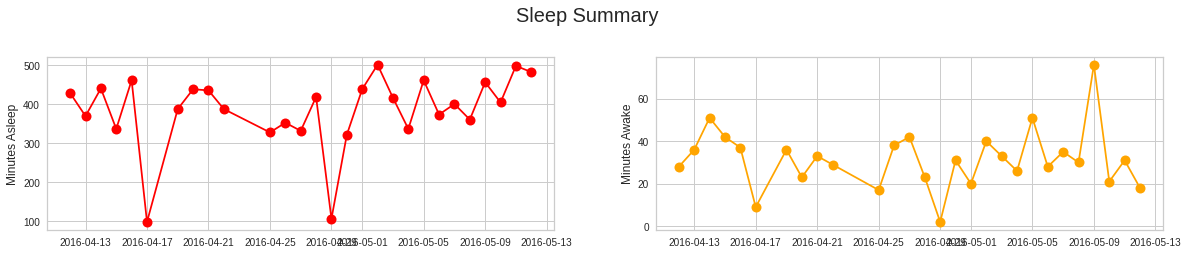

In [93]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(20,7))
plt.suptitle('Sleep Summary', fontsize=20)

plt.subplot(2, 2, 1)
plt.plot(sleep_sample['date'],sleep_sample['TotalMinutesAsleep'], linestyle='-', marker='o', markersize=10, color='red')
plt.tick_params(labelbottom='off')
plt.ylabel('Minutes Asleep', fontsize=12) 

plt.subplot(2, 2, 2)
plt.plot(sleep_sample['date'],sleep_sample['TotalMinutesAwake'], linestyle='-', marker='o', markersize=10, color='orange')
plt.tick_params(labelbottom='off')
plt.ylabel('Minutes Awake', fontsize=12)

#Amalgamation
###Merging Fitbit's heart rate data with daily activity data of all particpants. Join based on participant ID and date.

In [0]:
heart_dailyact = dailyact.merge(heart_mean, how='inner', left_on=['Id','date'], right_on=['participant-id','date'])

In [95]:
print(heart_dailyact.shape)

heart_dailyact.head()

(478, 18)


Id ActivityDate  TotalSteps  ...        date  participant-id  heart-rate
0  2022484408     4/1/2016       13603  ...  2016-04-01      2022484408   88.563916
1  2022484408     4/2/2016        5477  ...  2016-04-02      2022484408   72.068685
2  2022484408     4/3/2016       11144  ...  2016-04-03      2022484408   74.398232
3  2022484408     4/4/2016       15313  ...  2016-04-04      2022484408   78.295372
4  2022484408     4/5/2016       10805  ...  2016-04-05      2022484408   83.474328

[5 rows x 18 columns]

#Amalgamation

###Merging Fitbit's Sleep data with amalgamated data above. Joining column is date and participant ID.

In [0]:
fitbit=heart_dailyact.merge(sleep, how='inner', left_on=['Id','date'], right_on=['Id','date'])

###Previewing Amalgamated Data.

In [97]:
fitbit.shape

(186, 23)

In [98]:
fitbit.head()


Id ActivityDate  ...  TotalTimeInBed  TotalMinutesAwake
0  4020332650    4/12/2016  ...             541                 40
1  4020332650    4/12/2016  ...             541                 40
2  5553957443    4/12/2016  ...             464                 23
3  5553957443    4/12/2016  ...             464                 23
4  6962181067    4/12/2016  ...             387                 21

[5 rows x 23 columns]

###Correlation plots to prepare feature list necessary for modeling.

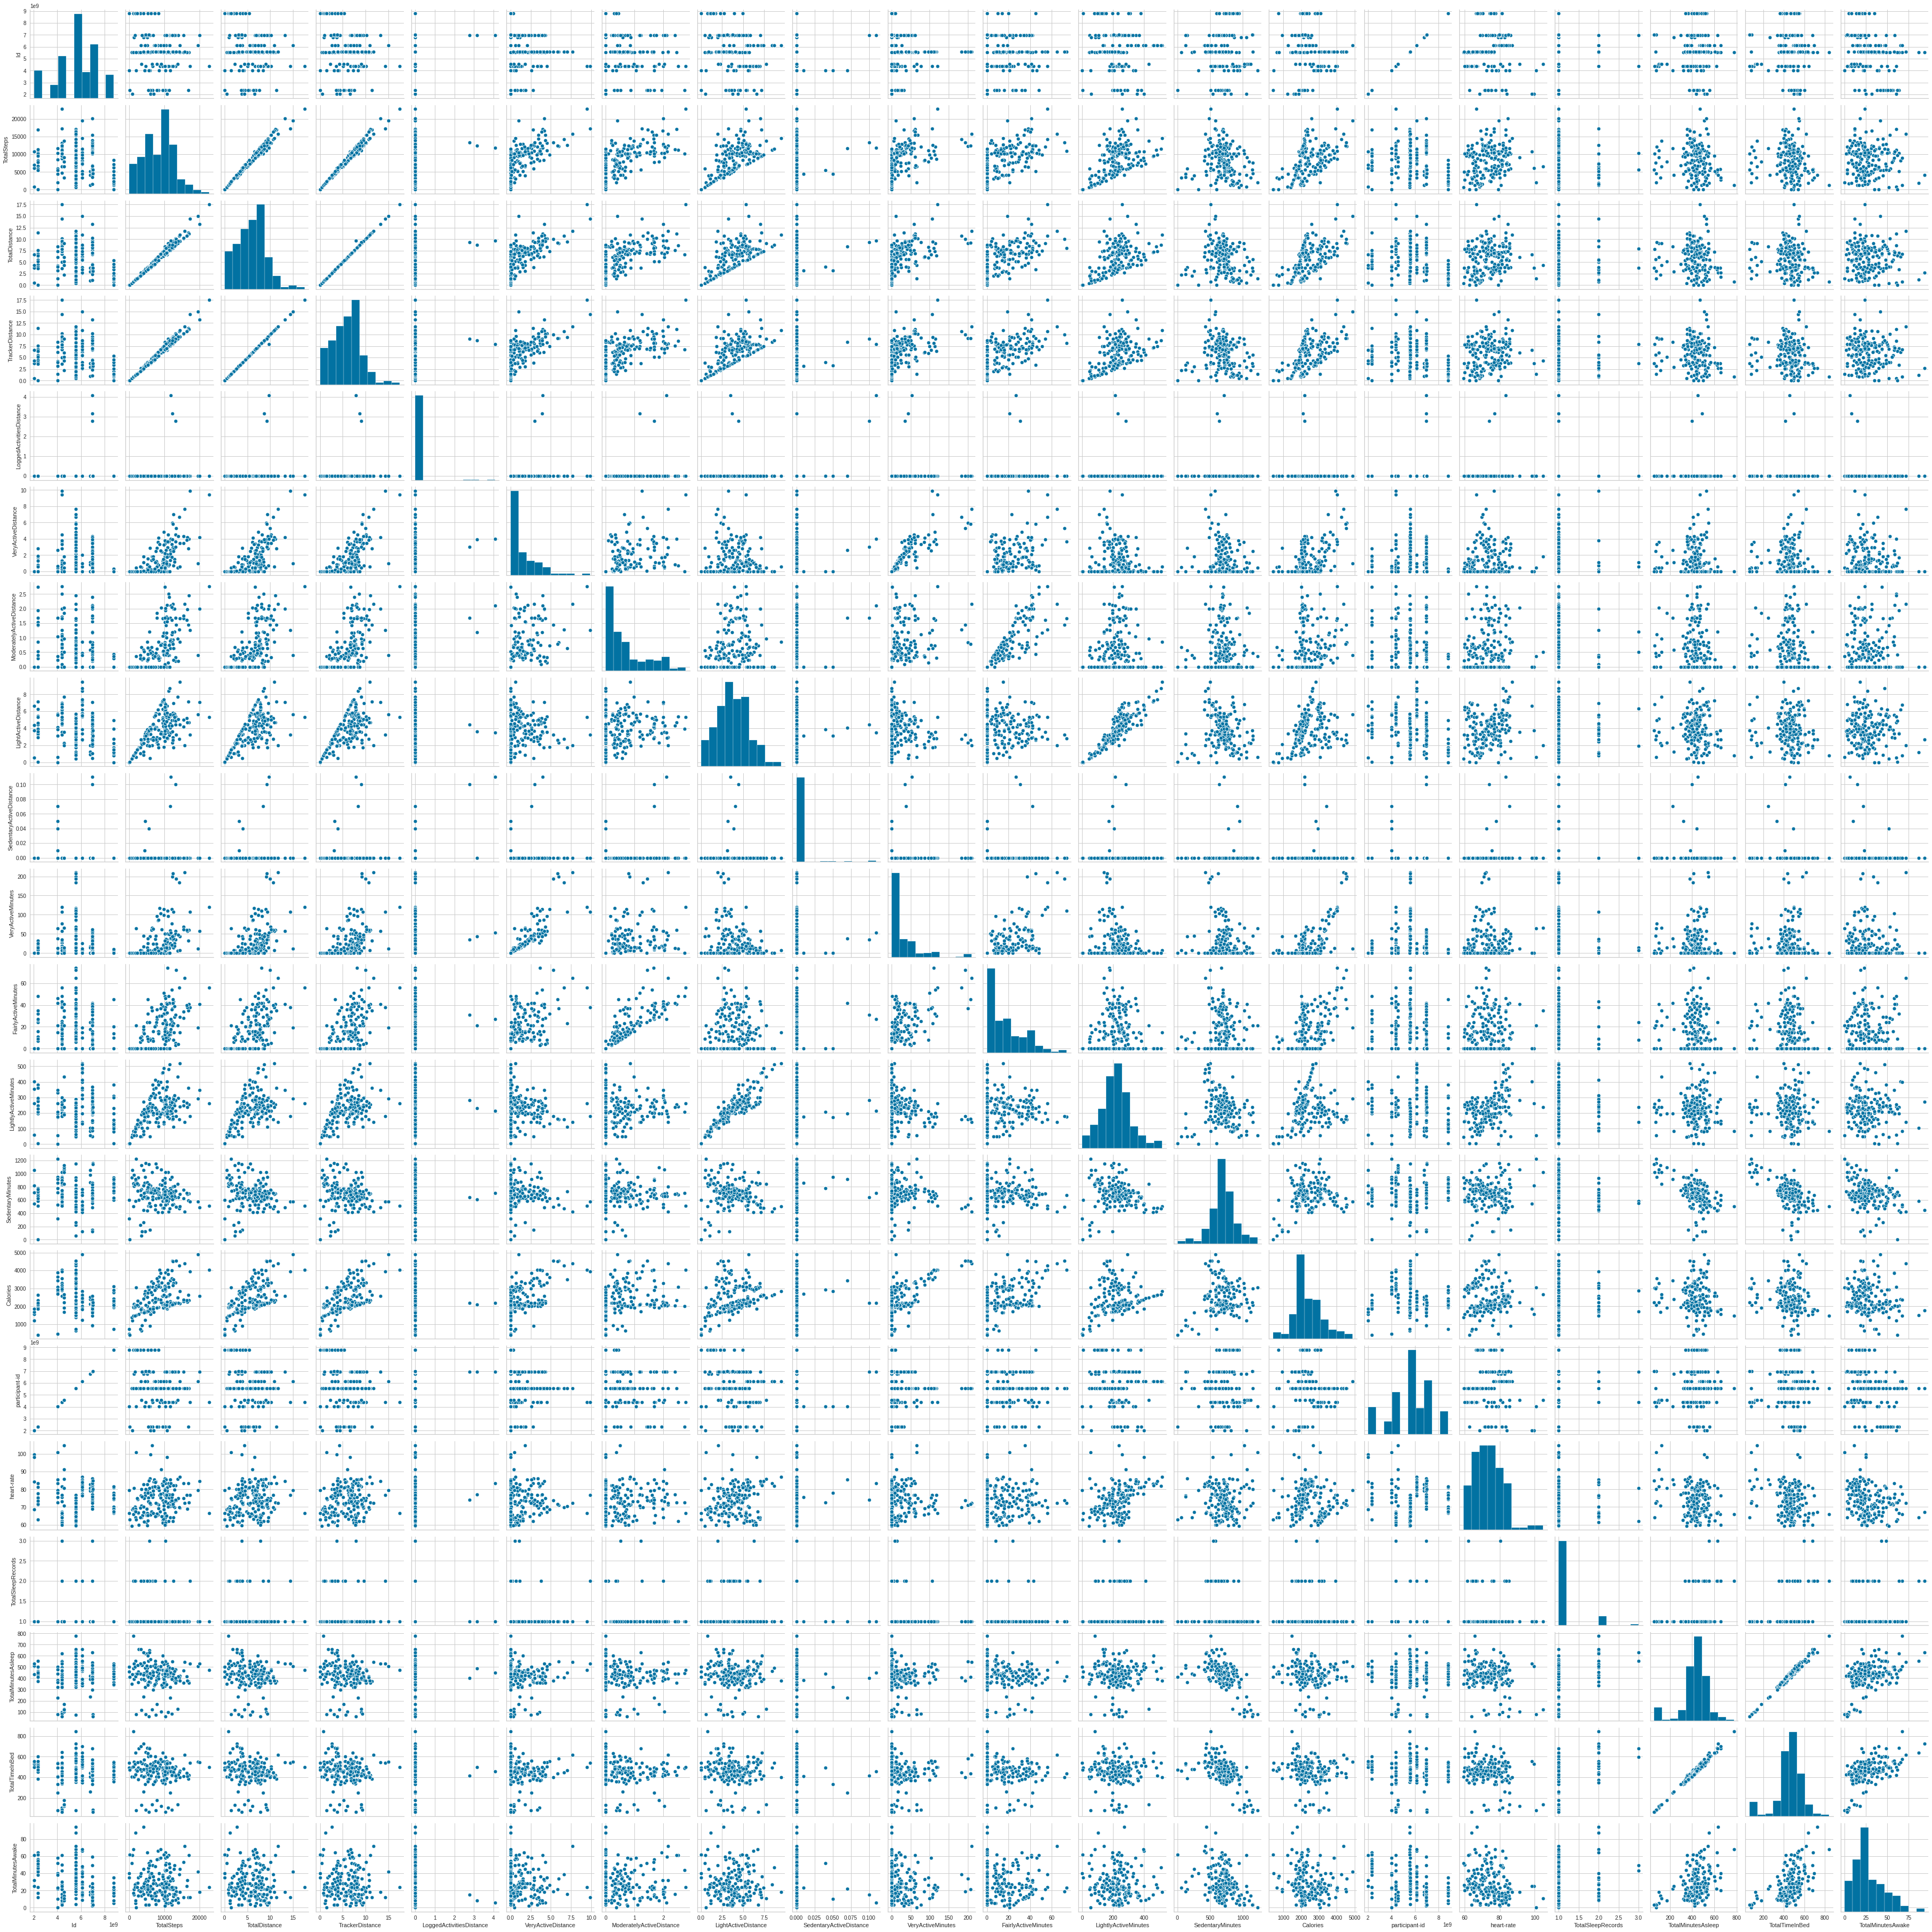

In [99]:
sns.pairplot(fitbit)

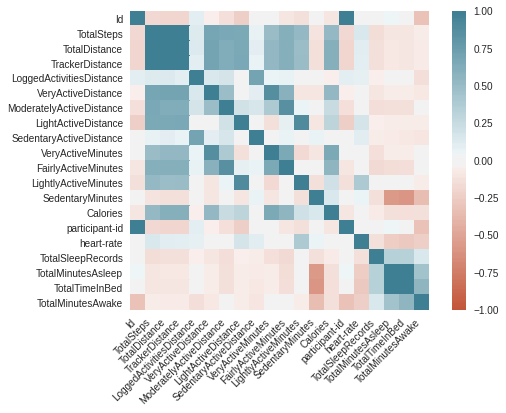

In [100]:
correlation = fitbit.corr()
ax = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#Modeling

###Here we will look at ways how sleep and daily activity patterns of the participants emerge and their influence on their heart health.

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split


###Feature selection: Dropping features with negative correlation.

####Considering all features contributing to lifestyle and setting prediction variable as heart rate.

In [0]:
model = LinearRegression()

features=fitbit.drop(['Id','participant-id','heart-rate','TotalSleepRecords','ActivityDate',\
                     'date','SleepDay','TotalMinutesAsleep','TotalMinutesAwake'],axis=1)

target=fitbit['heart-rate']



###Scaling the features before fitting the model.

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(features)

###Splitting the test/train data

In [0]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(data_scaled,target,test_size=0.10,random_state=2)

###Model evaluation

In [105]:
model.fit(Xtrain,Ytrain)
y_pred=model.predict(Xtest)
from sklearn.metrics import mean_squared_error
res = mean_squared_error(y_pred, Ytest)
print(res)
model.score(Xtest,Ytest)

28.772651669883953


0.5383477182261691

###Predictions

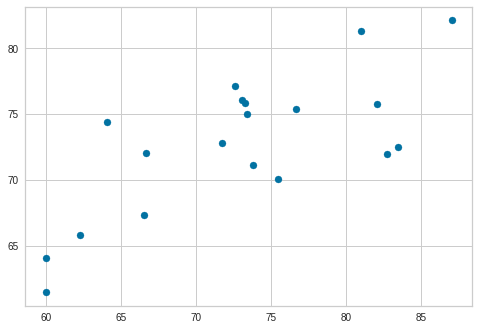

In [106]:
predictions = model.predict(Xtest)
plt.scatter(Ytest, predictions)


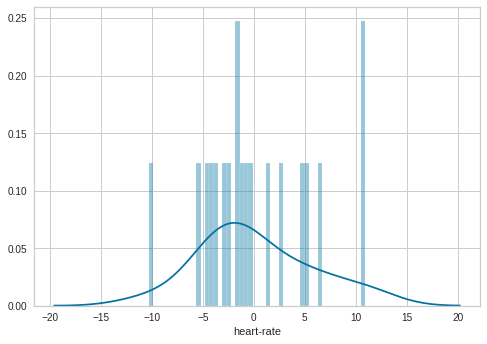

In [107]:
sns.distplot((Ytest-predictions),bins=50)

In [0]:

a = list(range(2,134))
print ("======== Hello from Invinibles Web MD : Enter Details ============ ")
i_name  = (input('Enter your name :'))
i_age = (int(input('Enter your age:')))
for i in range(len(x.columns)):
    print(str(i+1+1) + ":", x.columns[i])
choices = input('Enter the Serial no.s which is your Symptoms are exist:  ')
b = [int(x) for x in choices.split()]
count = 0
while count < len(b):
    item_to_replace =  b[count]
    replacement_value = 1
    indices_to_replace = [i for i,x in enumerate(a) if x==item_to_replace]
    count += 1
    for i in indices_to_replace:
        a[i] = replacement_value
a = [0 if x !=1 else x for x in a]
y_diagnosis, y_pred_2 = 0, 0
y_diagnosis = dt.predict([a])
y_pred_2 = dt.predict_proba([a])
print(('Name of the infection = %s , confidence score of : = %s') %(y_diagnosis[0],y_pred_2.max()* 100),'%' )
print(('Name = %s , Age : = %s') %(i_name,i_age))

## Metrics

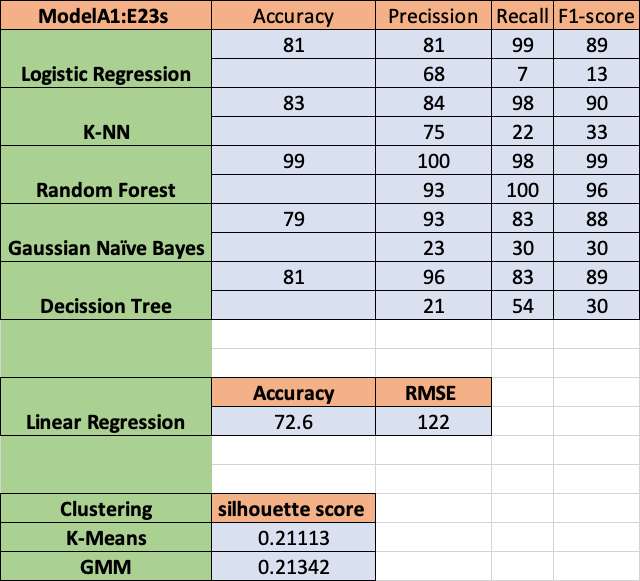

## Conclusion
* Various classification models were used to check the perfomrance of prediction and Random forest model seems to have a better performance out of all the other classification models, the above metrics shows the result.
* The prediction of systolic blood pressure using Linear regression worked with a good accuracy of 72%.
* Overall the data enrichment by adding a different dataset to the base dataset could increase the data and helped in better performance of the models.
